Step 1: Build a neural network that will act as a a sign language classifier. The goal is to produce a model that accepts a picture of a hand as input and outputs a letter.

In [100]:
#Import necessary dependencies#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='viridis')

from sklearn.metrics import confusion_matrix

In [101]:
#Let's import the dataset#
train_df = pd.read_csv("/home/kiri/ASL_Translator/Data/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/home/kiri/ASL_Translator/Data/sign_mnist_test/sign_mnist_test.csv")

#Print data frames to confirm we've pulled the correct things into the python code#
#print (train_df)
#print (test_df)

y_train = train_df['label']
y_test = test_df['label']
train_df.drop(['label'], axis=1, inplace=True)
test_df.drop(['label'], axis=1, inplace=True)

In [102]:
#Reshape data set
x_train = train_df.values.reshape(train_df.shape[0], 28,28,1)
x_test = test_df.values.reshape(test_df.shape[0], 28,28,1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (27455, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)


/tmp/ipykernel_22312/3006423818.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


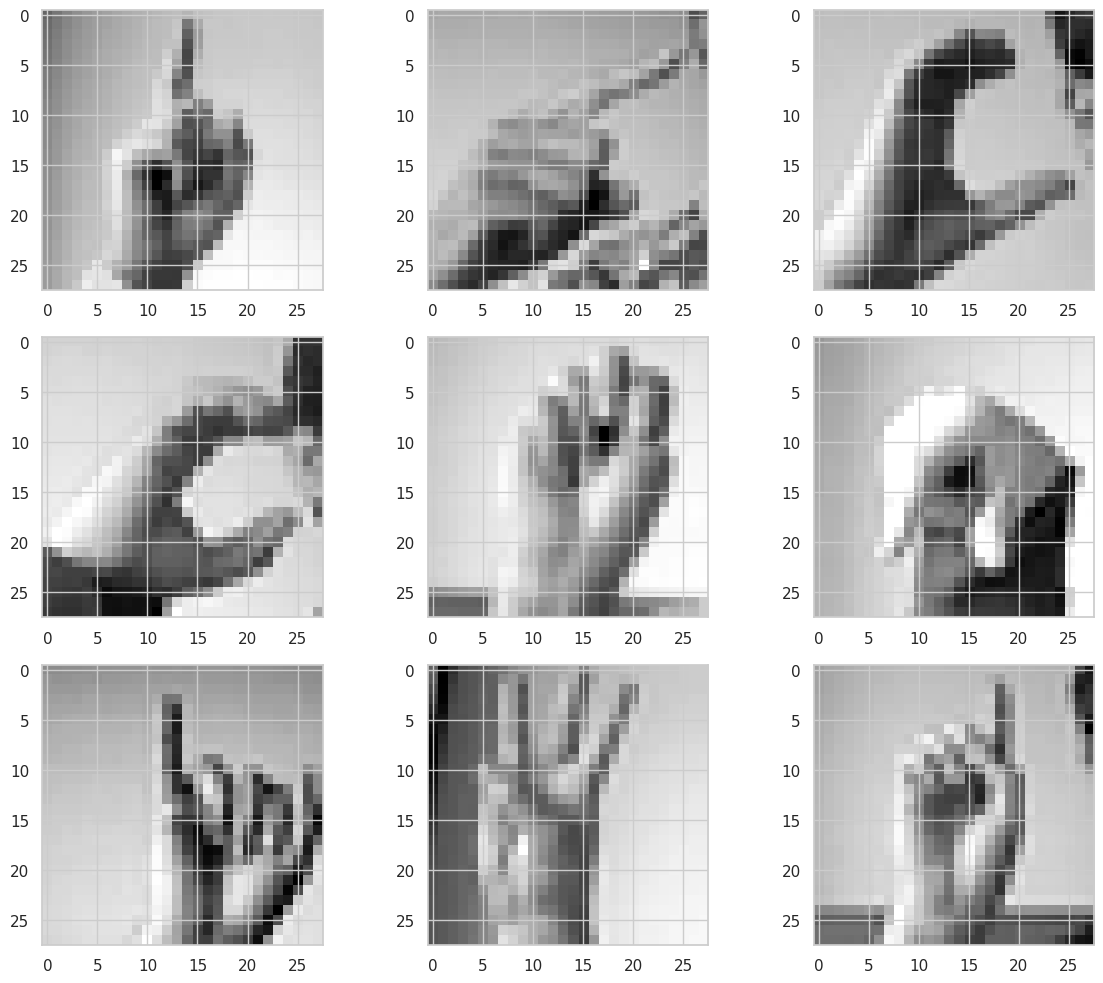

In [103]:
#Plot the first 9 images in the data set#
f, ax = plt.subplots(3,3) 
f.set_size_inches(12, 10)
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

This data set is rather small, so let's generate more input by randomly changing the data we do have.

In [104]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range = 0.2, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
data_augmentation.fit(x_train)
data_scaled = ImageDataGenerator(rescale=1./255)
x_train, x_test = data_augmentation.flow(x_train, y_train, batch_size=128), data_scaled.flow(x_test, y_test)

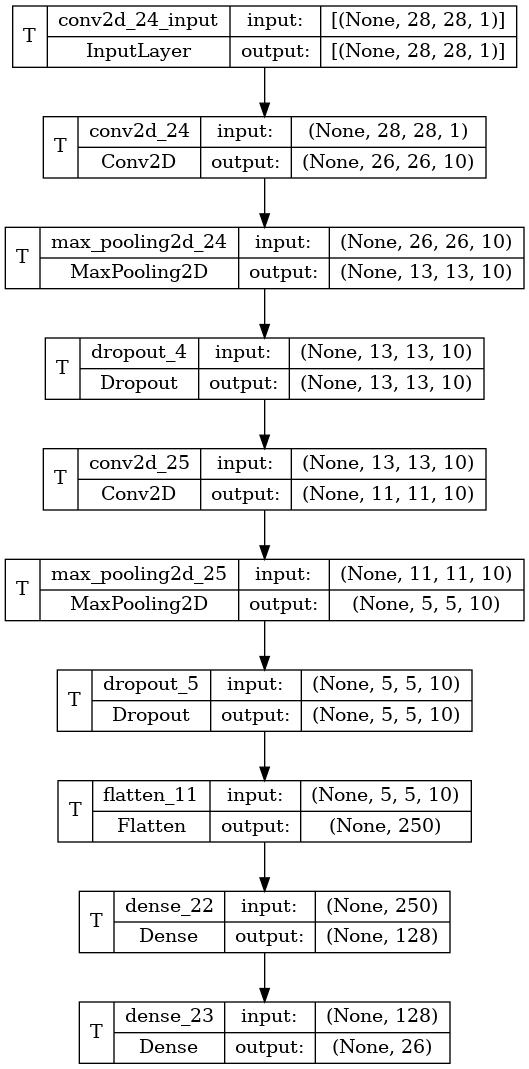

In [105]:
#Build the neural network why build it like this? see Khan and Gondhi, http://cs229.stanford.edu/proj2021spr/report2/81997848.pdf #
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2), Dropout(0.2),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') 
])

#these lines of code tell python to plot a figure in the notebook, and then save this as 'model.jpg' showing the neural network#
image_size = (28, 28)
keras.utils.plot_model(model, to_file="model.jpg", show_shapes=True, show_trainable=True)


In [106]:
#Train the model#
epochs=100
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, validation_data=x_test, epochs=epochs)

Epoch 1/100
215/215 [==============================] - 80s 336ms/step - loss: 3.1592 - accuracy: 0.0628 - val_loss: 2.9995 - val_accuracy: 0.1221
Epoch 2/100
215/215 [==============================] - 93s 434ms/step - loss: 2.8832 - accuracy: 0.1379 - val_loss: 2.4472 - val_accuracy: 0.2610
Epoch 3/100
215/215 [==============================] - 79s 366ms/step - loss: 2.6195 - accuracy: 0.2019 - val_loss: 2.0798 - val_accuracy: 0.3554
Epoch 4/100
215/215 [==============================] - 75s 347ms/step - loss: 2.4498 - accuracy: 0.2487 - val_loss: 1.8910 - val_accuracy: 0.3946
Epoch 5/100
215/215 [==============================] - 75s 348ms/step - loss: 2.2794 - accuracy: 0.2859 - val_loss: 1.6880 - val_accuracy: 0.4569
Epoch 6/100
215/215 [==============================] - 75s 349ms/step - loss: 2.1640 - accuracy: 0.3243 - val_loss: 1.5539 - val_accuracy: 0.4855
Epoch 7/100
215/215 [==============================] - 69s 320ms/step - loss: 2.0569 - accuracy: 0.3497 - val_loss: 1.5641 -

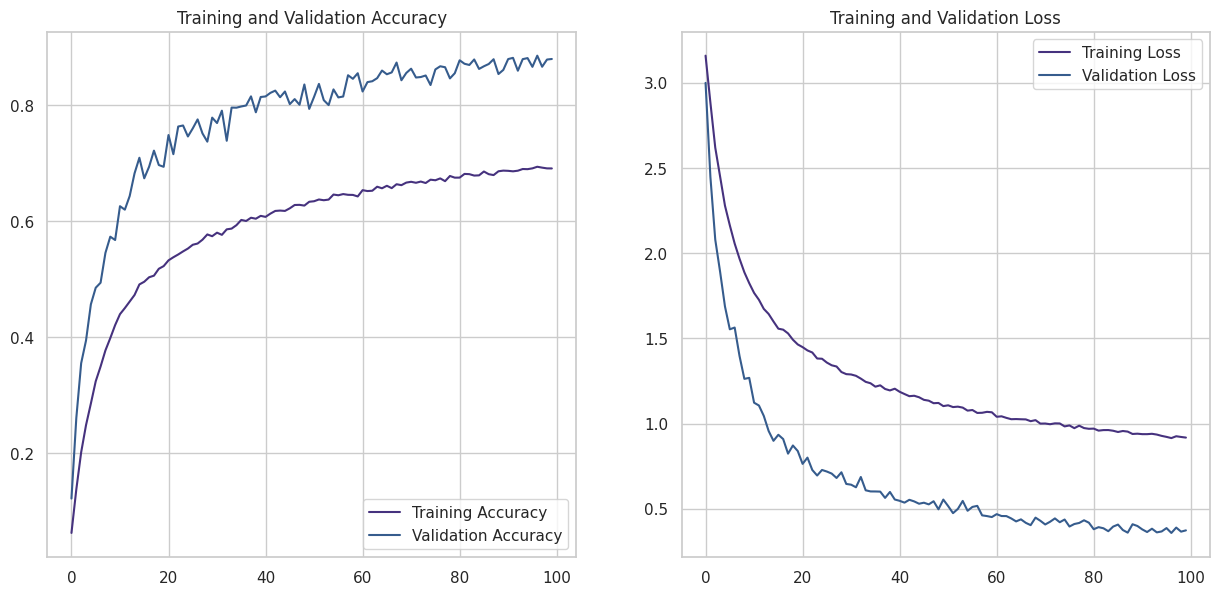

In [107]:
accuracy, val_accuracy = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs_trained = range(len(accuracy))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_trained, accuracy, label='Training Accuracy')
plt.plot(epochs_trained, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_trained, loss, label='Training Loss')
plt.plot(epochs_trained, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Accuracy, Loss.png')

In [108]:
score = model.evaluate(x_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])
df_test = pd.read_csv('/home/kiri/ASL_Translator/Data/sign_mnist_test.csv')
y_test = df_test['label']
x_test = test_df.values.reshape(test_df.shape[0], 28,28,1)

df_test.drop(['label'], axis=1, inplace=True)
print("x_test shape:", x_test.shape)
y_pred = np.argmax(model.predict(x_test), axis=1)


225/225 [==============================] - 4s 19ms/step - loss: 0.3743 - accuracy: 0.8798
Test Loss: 0.37430691719055176
Test Accuracy: 0.8798103928565979
x_test shape: (7172, 28, 28, 1)
225/225 [==============================] - 3s 13ms/step


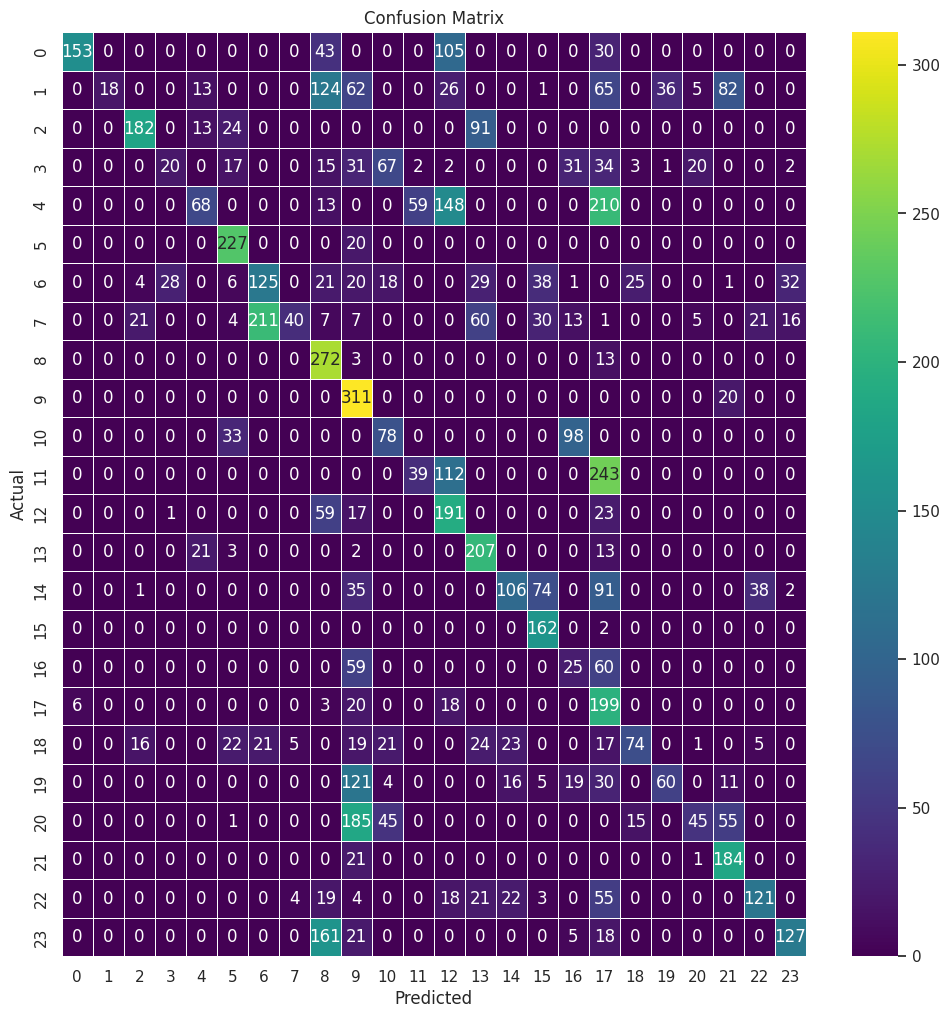

<Figure size 640x480 with 0 Axes>

In [109]:
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True, linewidth=.5, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion.png')
